In [1]:
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import astropy.units as u

import numpy as np
import time
import matplotlib.pyplot as plt

In [2]:
mh = '+0.0'
CtoO = '1.0'


filename_db="/Users/sagnickmukherjee/Documents/GitHub/picaso-dev/reference/opacities/ck_cx_cont_opacities.db"
ck_db='/Users/sagnickmukherjee/Documents/software/picaso-dev/reference/opacities/ck_db/sonora_2020_feh+000_co_100.data.196'

opacity_ck = jdi.opannection(ck=True, ck_db=ck_db,filename_db=filename_db)


In [6]:
Teff_ar = np.array([400])
grav_ar = np.array([1000])
kzz=np.array([1e-500])


gases_fly = ['CO','CH4','H2O','NH3','CO2','N2','HCN','H2','PH3','C2H2','Na','K','TiO','VO','FeH']

for iii in range(len(kzz)):
    T_eff= Teff_ar[0]
    grav = grav_ar[0]
    nlevel = 91

    ## Brown Dwarf 
    T_star = "NA"
    semi_major = "NA" # AU
    self_consistent_kzz= False # Only needed if you want to do on-the-fly calculation with MLT Kzz
    cl_run = jdi.inputs(calculation="brown", climate = True)

    cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)'))
    cl_run.T_eff(Teff=T_eff)




    #pressure=np.logspace(np.log10(1.77000392e-04),np.log10(80.0),nlevel) # set your pressure grid
    temp_guess = np.zeros(shape=(nlevel))
    kz = np.zeros(shape =(nlevel))

    ## load a bobcat model
    pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(Teff_ar[0])+"g"+str(grav_ar[0])+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
    #pressure=pressure_dummy
    pressure = np.logspace(np.log10(1.7e-3),np.log10(500),91)
    for i in range(len(temp_guess)):
        temp_guess[i] = temp_guess[i] # perturb the profile
        kz[i] = kzz[iii] #0

    nofczns = 1
    nstr = np.array([0,75,89,0,0,0]) # initial guess of convective zones
    rfacv = 0.0
    rfaci =1.0
    cloudy = False # not cloudy
    fsed = 0.0
        ##
    cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure, nstr = nstr, nofczns = nofczns , rfacv = rfacv, rfaci = rfaci, cloudy = cloudy, mh = mh, CtoO = CtoO,species = ['MgSiO3','Mg2SiO4','Fe'], fsed = fsed)
    pressure , temp, dtdp, nstr_new, flux_plus_final,quench_levels, df, all_profiles, all_kzz,opd_,g0_,w0_ = cl_run.run_climate_model(opacity_ck,save_all_profiles=True, save_all_kzz = True,diseq_chem = True, self_consistent_kzz =self_consistent_kzz, kz = kz,vulcan_run = False,on_fly=False,gases_fly=gases_fly)
    
    
    

Iteration number  0 , min , max temp  110.72411568884436 1845.9052119975884 , flux balance  -0.3902117827098852
Iteration number  1 , min , max temp  115.58431708999485 2016.7586922743162 , flux balance  0.12429909391465854
Iteration number  2 , min , max temp  115.90118431133254 1981.2448713980732 , flux balance  0.006342902197950506
Iteration number  3 , min , max temp  116.16262415578291 1978.6939000717755 , flux balance  2.866791973200763e-05
Iteration number  4 , min , max temp  116.21526092634028 1978.6785228520662 , flux balance  9.68457170929753e-08
 We are already at a root, tolf , test =  5e-05 ,  1.3965867435528612e-07
Big iteration is  116.21526092634028 0
Iteration number  0 , min , max temp  132.3060849579128 2008.9214354449234 , flux balance  -0.046278566567922994
Iteration number  1 , min , max temp  122.53622231972606 2018.731113095505 , flux balance  0.0008743870648019791
Iteration number  2 , min , max temp  119.94721473542829 2018.579313836025 , flux balance  5.6960

Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
661
DOING DISEQ CALCULATIONS NOW
Iteration number  0 , min , max temp  129.334501077147 1963.80881270141 , flux balance  0.0008021601617526073
Iteration number  1 , min , max temp  129.00591622591958 1963.789790560042 , flux balance  6.713039400958954e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
Big iteration is  129.00591622591958 0
Iteration number  0 , min , max temp  127.88742467905546 1959.9144193373384 , flux balance  0.00013728604634551158
Iteration number  1 , min , max temp  127.87675808129994 1959.8743544475929 , flux balance  5.170488032894354e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
Profile converged
Iteration number  0 , min , max temp  127.6315660129286 1952.3051420789038 , flux balance  -2.213663619737936e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
Big iteration is  127.6315660129286 0
Iteration 

Profile converged
[ 0 47 57 57 61 89]
Iteration number  0 , min , max temp  131.2911945556478 1936.917961820341 , flux balance  0.00033265253717784665
Iteration number  1 , min , max temp  131.28734869809196 1936.909752937923 , flux balance  9.824941334571794e-07
Converged Solution in iterations  1
Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
Big iteration is  131.28734869809196 0
Iteration number  0 , min , max temp  131.44468727741312 1937.852970948333 , flux balance  -7.97918028455579e-06
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
Profile converged
[ 0 47 58 58 61 89]
Iteration number  0 , min , max temp  131.92339403962447 1936.1762012793329 , flux balance  8.112698804150054e-05
Converged Solution in iterations  0
Quench Levels are CO, CO2, NH3, HCN  [0 0 0 0]
Big iteration is  131.92339403962447 0
Iteration number  0 , min , max temp  131.71164755936115 1936.665595172266 , flux balance  -9.316134933911323e-06
Converged Solution in iteratio

In [7]:
path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/onfly/"

filename= path+"tpfile/tp_allonfly_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
np.savetxt(filename, np.transpose([pressure,temp]), header= str("nstr "+str(nstr_new)+" T_eff "+str(T_eff)+" grav "+ str(grav)+" kz "+str(kz[0])+" T_star "+str(T_star)+" semi-major[AU] "+str(semi_major)))        

csv = path+"profile/profile_allonfly_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
df.to_csv(csv,sep='\t')

hist = path+"hist/hist_allonfly_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
np.savetxt(hist, all_profiles)

hist = path+"hist/hist_kz_allonfly_planet_"+str(Teff_ar[0])+"_grav_"+str(grav_ar[0])+"_eq.dat"
np.savetxt(hist, all_kzz)

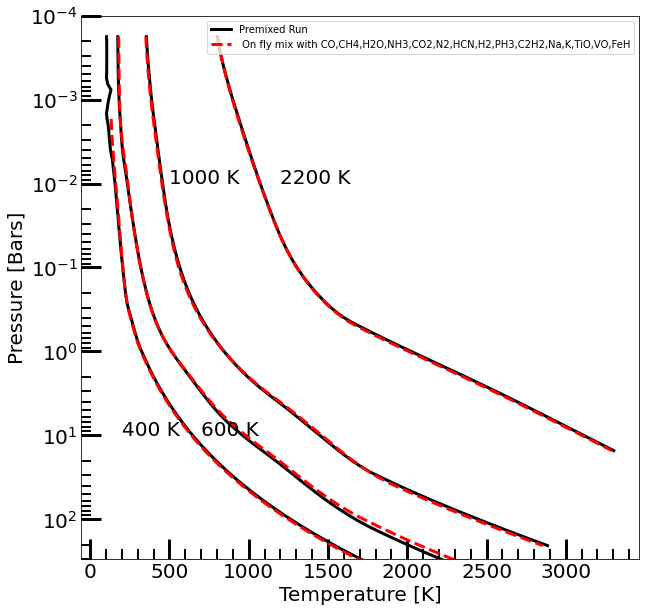

In [29]:
plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]",fontsize=20)
plt.xlabel("Temperature [K]",fontsize=20)
plt.ylim(300,1e-4)

path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/onfly/"
filename1= path+"tpfile/tp_allonfly_planet_"+str(2200)+"_grav_"+str(1000)+"_eq.dat"
pressure_dummy,temp_dummy = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(2200)+"g"+str(1000)+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
pressure_1,temp_1 = np.loadtxt(filename1,usecols=[0,1],unpack=True)
plt.semilogy(temp_dummy,pressure_dummy,linewidth=3,color="k",label="Premixed Run")
plt.semilogy(temp_1,pressure_1,linestyle="--",color="r",linewidth=3,label=" On fly mix with CO,CH4,H2O,NH3,CO2,N2,HCN,H2,PH3,C2H2,Na,K,TiO,VO,FeH")


path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/onfly/"
filename1= path+"tpfile/tp_allonfly_planet_"+str(1000)+"_grav_"+str(1000)+"_eq.dat"
pressure_dummy,temp_dummy = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(1000)+"g"+str(1000)+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
pressure_1,temp_1 = np.loadtxt(filename1,usecols=[0,1],unpack=True)
plt.semilogy(temp_dummy,pressure_dummy,linewidth=3,color="k")
plt.semilogy(temp_1,pressure_1,linestyle="--",color="r",linewidth=3)


path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/onfly/"
filename1= path+"tpfile/tp_allonfly_planet_"+str(600)+"_grav_"+str(1000)+"_eq.dat"
pressure_dummy,temp_dummy = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(600)+"g"+str(1000)+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
pressure_1,temp_1 = np.loadtxt(filename1,usecols=[0,1],unpack=True)
plt.semilogy(temp_dummy,pressure_dummy,linewidth=3,color="k")
plt.semilogy(temp_1,pressure_1,linestyle="--",color="r",linewidth=3)


path = "/Users/sagnickmukherjee/Documents/GitHub/picaso/Benchmarking/onfly/"
filename1= path+"tpfile/tp_allonfly_planet_"+str(400)+"_grav_"+str(1000)+"_eq.dat"
pressure_dummy,temp_dummy = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(400)+"g"+str(1000)+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)
pressure_1,temp_1 = np.loadtxt(filename1,usecols=[0,1],unpack=True)
plt.semilogy(temp_dummy,pressure_dummy,linewidth=3,color="k")
plt.semilogy(temp_1,pressure_1,linestyle="--",color="r",linewidth=3)

plt.annotate("400 K",(200,10),fontsize=20)
plt.annotate("600 K",(700,10),fontsize=20)
plt.annotate("1000 K",(500,1e-2),fontsize=20)
plt.annotate("2200 K",(1200,1e-2),fontsize=20)



plt.minorticks_on()
plt.tick_params(axis='y',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='y',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.tick_params(axis='x',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='x',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.legend(fontsize=10)
plt.savefig("Benchmarking/onfly/onfly_benchmarking.pdf")

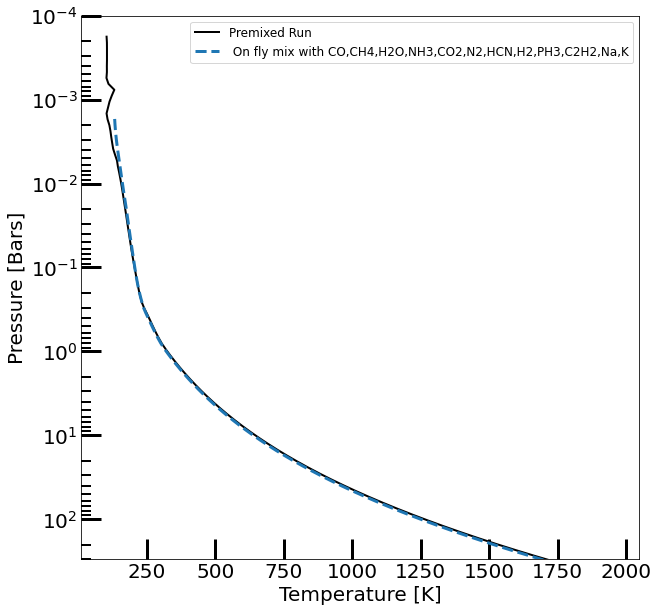

In [8]:
pressure_dummy,temp_guess = np.loadtxt("/Users/sagnickmukherjee/Documents/software/picaso-dev/Evolution/structures_m+0.0/t"+str(Teff_ar[0])+"g"+str(grav_ar[0])+"nc_m0.0.dat",usecols=[1,2],unpack=True, skiprows = 1)


plt.figure(figsize=(10,10))
plt.ylabel("Pressure [Bars]",fontsize=20)
plt.xlabel("Temperature [K]",fontsize=20)

plt.ylim(300,1e-4)
plt.semilogy(temp_guess,pressure_dummy,linewidth=2,color="k",label="Premixed Run")
plt.semilogy(temp,pressure,linestyle="--",linewidth=3,label=" On fly mix with CO,CH4,H2O,NH3,CO2,N2,HCN,H2,PH3,C2H2,Na,K")

plt.tick_params(axis='y',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='y',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.tick_params(axis='x',which='major',length =20, width=3,direction='in',labelsize=20)
plt.tick_params(axis='x',which='minor',length =10, width=2,direction='in',labelsize=20)
plt.legend(fontsize=12)